In [1]:
import xarray as xr
import numpy as np
import intake_informaticslab
import intake
import matplotlib
import matplotlib.pyplot as plt

# Some MOGREPS-UK examples 

### Open the whole dataset at once and get a size approximation.

In [76]:
mogreps_uk_ds = intake.cat.met_office.weather_forecasts.mogreps_uk(license_accepted=True).to_dask()
mogreps_uk_ds

,Array,Chunk
Bytes,1.78 TB,12.13 MB
Shape,"(1154, 127, 3, 970, 1042)","(1, 1, 3, 970, 1042)"
Count,146559 Tasks,146558 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,1.78 TB,12.13 MB
Shape,"(1154, 127, 3, 970, 1042)","(1, 1, 3, 970, 1042)"
Count,146559 Tasks,146558 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [86]:
total_points = 0
for var in mogreps_uk_ds.data_vars:
    num_points = np.product(mogreps_uk_ds[var].shape)
    total_points += num_points

print("For the whole dataset above:")
print(f"\tNumber of points = {total_points:,}")
print(f"\tApprox uncompressed data volume = {mogreps_uk_ds.nbytes / 10**12:.1f}TB")

For the whole dataset above:
	Number of points = 28,441,350,320,640
	Approx uncompressed data volume = 113.8TB


## Open each catalogue individually and show some plots

### Plotting data from the "pressure levels" catalogue

In [9]:
ds_pressure_level = intake.cat.met_office.weather_forecasts.mogreps_uk.pressure_level(license_accepted=True).to_dask()
ds_pressure_level

,Array,Chunk
Bytes,5.32 TB,36.39 MB
Shape,"(1151, 127, 3, 3, 970, 1042)","(1, 1, 3, 3, 970, 1042)"
Count,146178 Tasks,146177 Chunks
Type,float32,numpy.ndarray


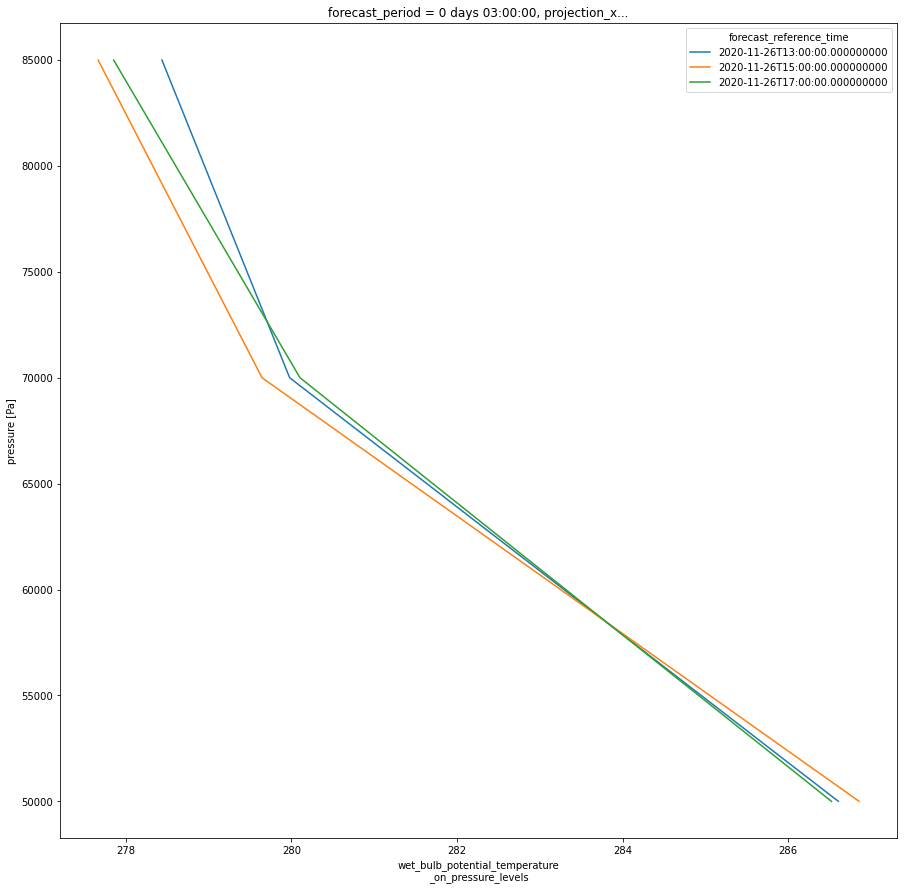

In [49]:
ds_pressure_level.wet_bulb_potential_temperature_on_pressure_levels[[5,7,9],3].mean('realization')[:,:,500,500].plot.line(y='pressure')

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
ds_pressure_level.wet_bulb_potential_temperature_on_pressure_levels[[2,-9,-7,],1,:,:,:,:].mean(dim=['projection_y_coordinate','projection_x_coordinate','realization']).plot.line(y='pressure')

### Plotting data from the "height levels" catalogue

In [24]:
ds_height_level = intake.cat.met_office.weather_forecasts.mogreps_uk.height_level(license_accepted=True).read_chunked()
ds_height_level

,Array,Chunk
Bytes,58.61 TB,400.25 MB
Shape,"(1153, 127, 3, 33, 970, 1042)","(1, 1, 3, 33, 970, 1042)"
Count,146432 Tasks,146431 Chunks
Type,float32,numpy.ndarray


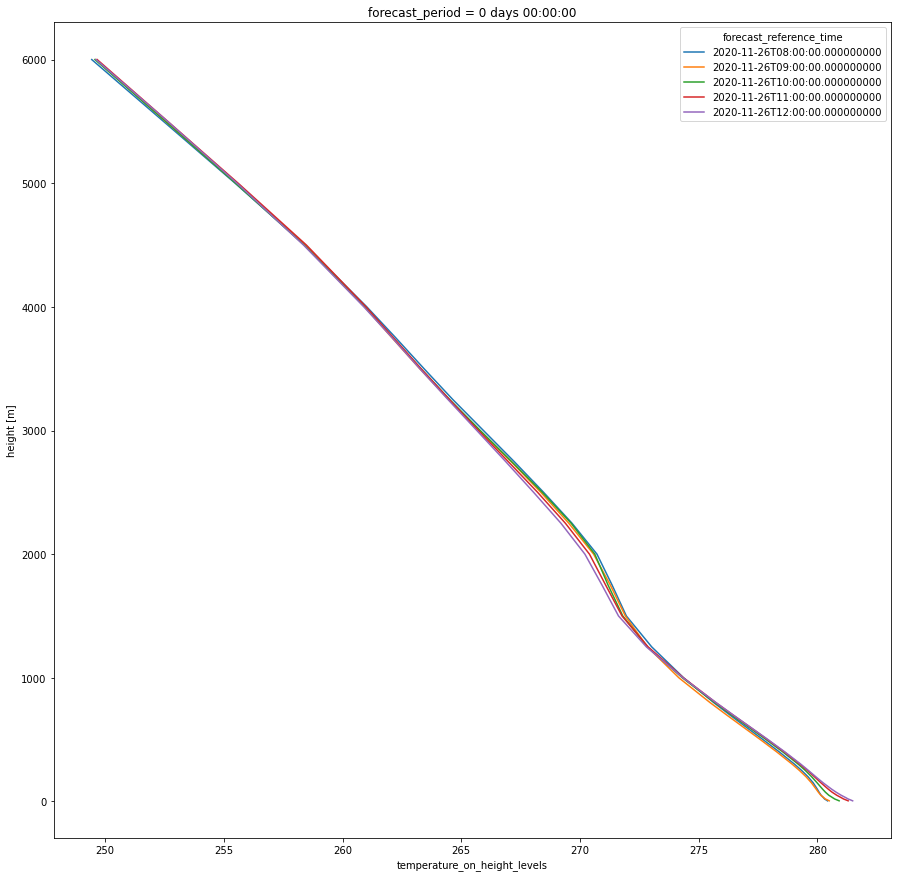

In [37]:
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
ds_height_level.temperature_on_height_levels[:5,0,:,:,:,:].mean(dim=['projection_y_coordinate','projection_x_coordinate','realization']).plot.line(y='height')

### Plotting data from the "depth levels" catalogue

In [27]:
depth_level_ds = intake.cat.met_office.weather_forecasts.mogreps_uk.depth_level(license_accepted=True).read_chunked()
depth_level_ds

,Array,Chunk
Bytes,7.10 TB,48.52 MB
Shape,"(1153, 127, 3, 4, 970, 1042)","(1, 1, 3, 4, 970, 1042)"
Count,146432 Tasks,146431 Chunks
Type,float32,numpy.ndarray


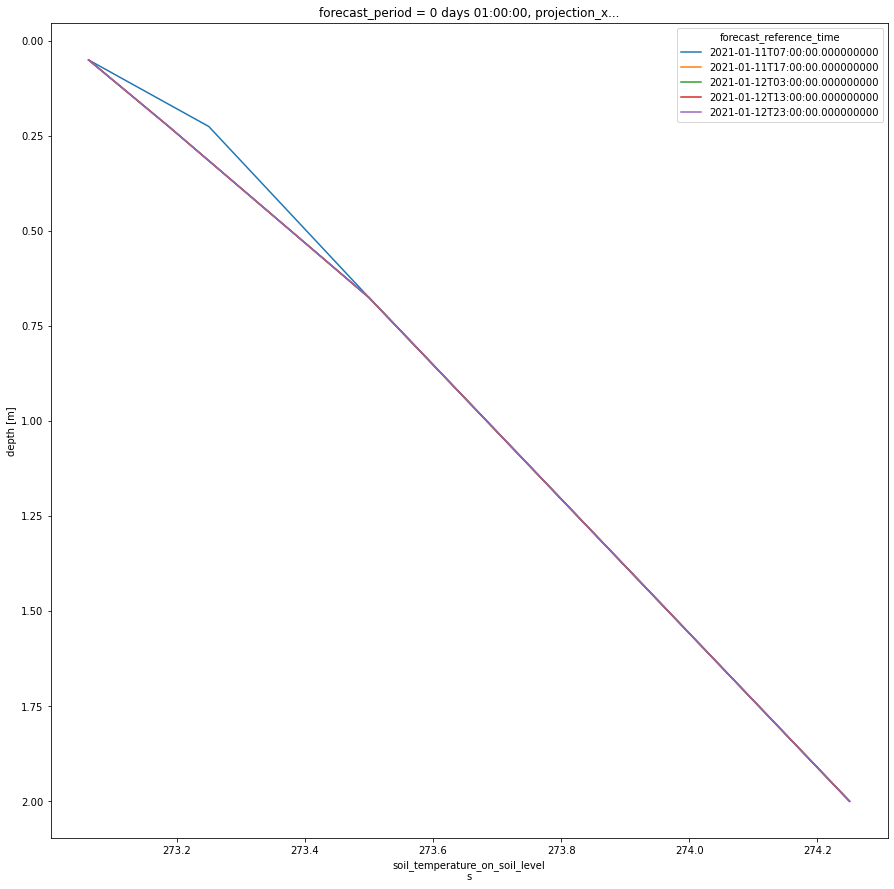

In [40]:
depth_level_ds.soil_temperature_on_soil_levels[slice(-50,-1,10),1,:,:,900,900].min(dim='realization').plot.line(y='depth', yincrease=False)

### Single level

Show four randomly selected forcasts from the 'single level' catalogue

In [45]:
single_level_ds = intake.cat.met_office.weather_forecasts.mogreps_uk.single_level(license_accepted=True).read_chunked()

cloud_amount_of_total_cloud [376,40]


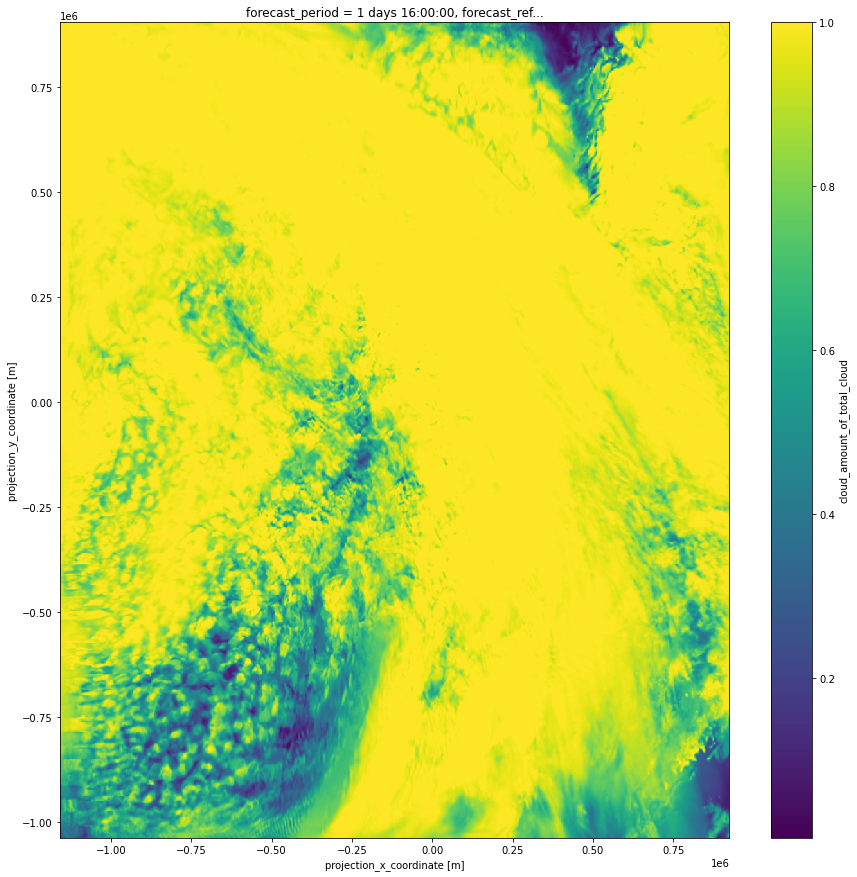

fog_fraction_at_screen_level [817,31]


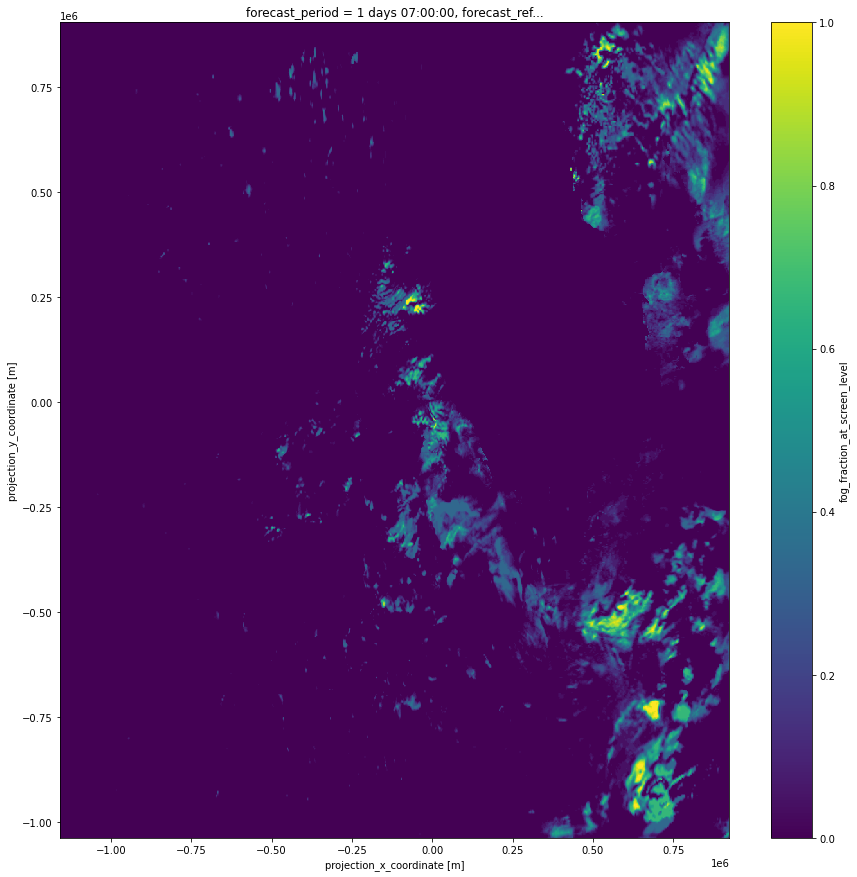

wind_speed_at_10m [445,31]


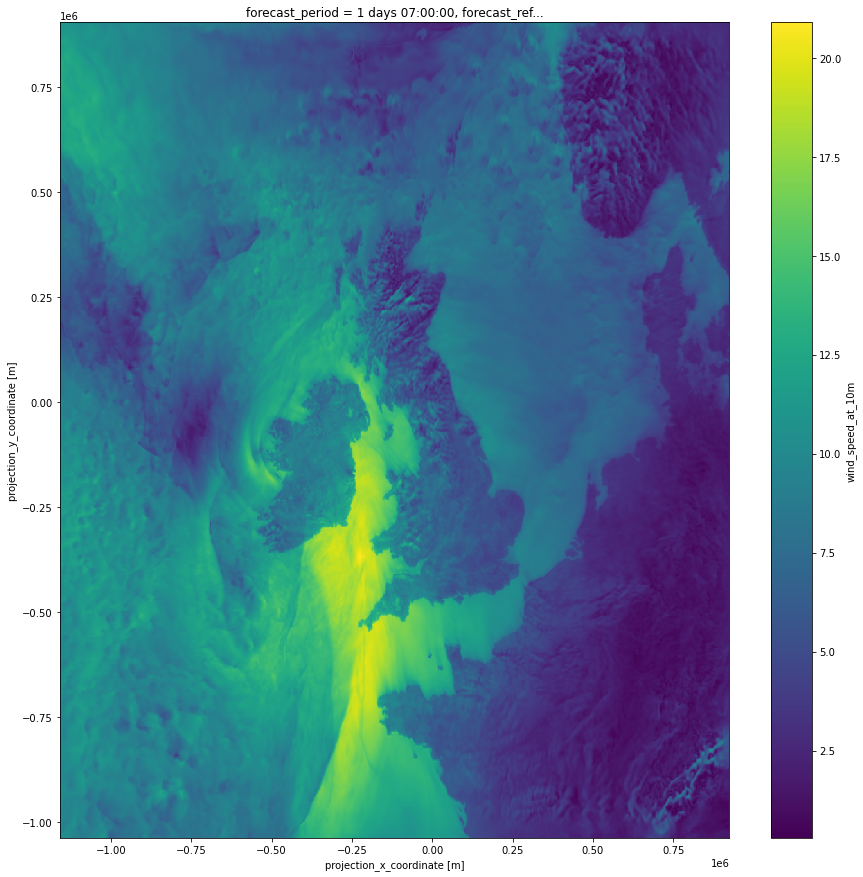

fog_fraction_at_screen_level [1087,10]


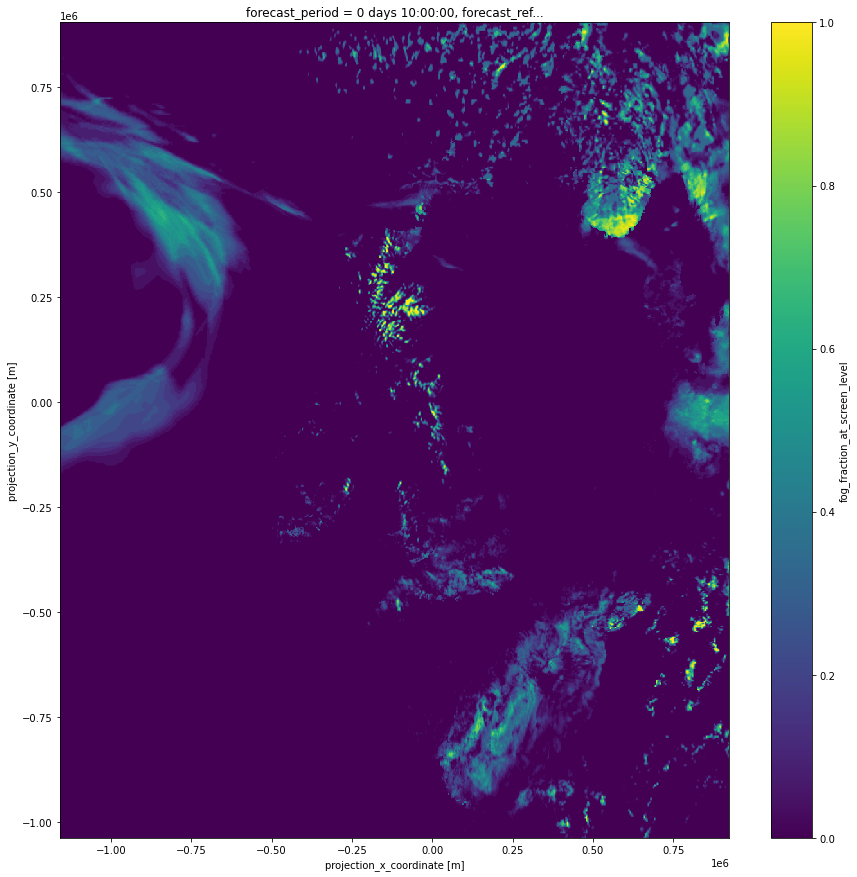

In [51]:
import random
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
for var in random.choices(list(single_level_ds.data_vars),k=4):
#     for i in random.choices(range(single_level_ds[var].shape[0]), k=3):
        
        i = random.randint(0, single_level_ds[var].shape[0] -1)
        j = random.randint(0, single_level_ds[var].shape[1] -1)
        print(var, f"[{i},{j}]")
        single_level_ds[var][i,j].mean(dim='realization').plot()
        plt.show()
